In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [5]:
def load_pointset(path: str) -> ([], []):
    xs = []
    ys = []
    
    with open(path, 'r') as points_file:
        for line in points_file.readlines()[1:]:
            x, y = line.split(" ")
            y.replace("\n", "")
            
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [16]:
def load_spectrum_to_matrix(freqpath: str) -> np.ndarray:
    minfreq = 1.0e36
    maxfreq = 0.0
    
    freqs = []
    
    with open(freqpath, 'r') as spectrum:
        dimension = int(spectrum.readline())
        for line in spectrum.readlines():
            freqs.append(float(line))
            minfreq = min(float(line), minfreq)
            maxfreq = max(float(line), maxfreq)
    
    matrix = np.zeros((dimension, dimension))
    
    for row in range(dimension):
        for col in range(dimension):
            frequency = freqs[row * dimension + col]
            # normalize
            #frequency = (frequency - minfreq) / (maxfreq - minfreq)
            frequency = math.sqrt(frequency / maxfreq);
            matrix[row][col] = frequency
    return matrix

In [7]:
def load_pcf(pcfpath: str) -> ([],[]):
    xs = []
    ys = []
    with open(pcfpath, 'r') as pcffile:
        for line in pcffile.readlines():
            ys.append(float(line))
    xs = range(len(ys))

    return (xs, ys)

In [8]:
def load_radspec(specpath: str) -> ([], []):
    xs = []
    ys = []

    with open(specpath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(", ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [9]:
def load_pcfseries(folderpath):
    pcffiles = os.listdir(folderpath)
    values = {}

    for  pcffilename in pcffiles:
        cutoff = pcffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_pcf(os.path.join(folderpath, pcffilename))


    return values

In [7]:
def load_heck_pcf(filepath):
    xs = []
    ys = []

    with open(filepath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(" ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [8]:
def load_heck_pcfseries(folderpath):
    pcffiles = os.listdir(folderpath)
    values = {}

    for pcffilename in pcffiles:
        filename, file_extension = os.path.splitext(os.path.join(folderpath, pcffilename))
        if file_extension != ".txt":
            continue
        cutoff = pcffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_heck_pcf(os.path.join(folderpath, pcffilename))


    return values

In [18]:
def load_utk_rdfseries(folderpath):
    rdffiles = os.listdir(folderpath)
    values = {}

    for rdffilename in rdffiles:
        filename, file_extension = os.path.splitext(os.path.join(folderpath, rdffilename))
        if file_extension != ".txt":
            continue
        cutoff = rdffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_radspec(os.path.join(folderpath, rdffilename))


    return values

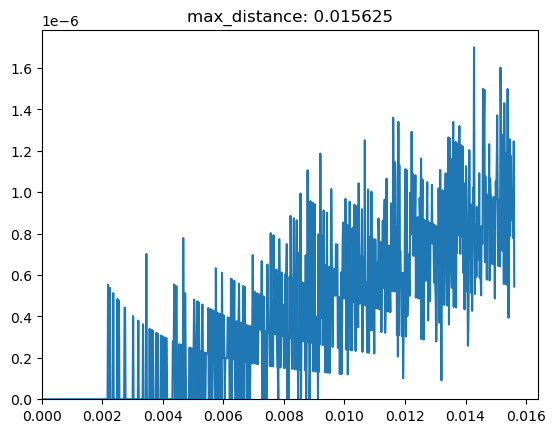

In [10]:
from matplotlib import animation

functions = load_utk_rdfseries("../result_data/rdffiles_Heck_UTK/")

keys = sorted(functions.keys())

fig, ax = plt.subplots()

plot = ax.plot(functions[keys[0]][0], functions[keys[0]][1])[0]
ax.set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

def update(frame):
    # determine maximum for plot scaling
    maxx = max(functions[keys[frame]][0])
    maxy = max(functions[keys[frame]][1])
    
    ax.set(xlim=[0, maxx * 1.05], ylim=[0, maxy * 1.05])
    ax.set_title("max_distance: " + keys[frame])
    plot.set_xdata(functions[keys[frame]][0])
    plot.set_ydata(functions[keys[frame]][1])

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(keys), interval=300)
anim.save("animation_UTK_Heck.mp4", dpi=600)

In [17]:
# Plotting of compound animation
from matplotlib import animation

LINEWIDTH = 0.6

utk_rdfdata = load_utk_rdfseries("../result_data/rdffiles_Heck_UTK/")
psa_rdfdata = load_heck_pcfseries("../result_data/pcffiles_PSA/")
utk_pcfdata = load_pcfseries("../result_data/pcffiles_UTK/")

utk_rdf_keys = sorted(utk_rdfdata.keys())
psa_keys = sorted(psa_rdfdata.keys())
utk_pcf_keys = sorted(utk_pcfdata.keys())

assert utk_rdf_keys == psa_keys == utk_pcf_keys

fig, ax = plt.subplots(2,2, sharex=False, sharey=False)
fig.tight_layout()

plot_utk_rdf = ax[0][0].plot(utk_rdfdata[utk_rdf_keys[0]][0], utk_rdfdata[utk_rdf_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[0][0].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

plot_psa_rdf = ax[0][1].plot(psa_rdfdata[psa_keys[0]][0], psa_rdfdata[psa_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[0][1].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

plot_utk_pcf = ax[1][0].plot(utk_pcfdata[utk_pcf_keys[0]][0], utk_pcfdata[utk_pcf_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[1][0].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

ax[1][1].set_axis_off()
ax[1][1].set(xlim=[0, 1.0], ylim=[0, 1.0])
ax[1][1].text(0.4, 0.4, "max_distance: \n" + utk_pcf_keys[0])

def update(frame):
    # determine maximum for plot scaling
    maxx_0 = max(utk_rdfdata[utk_rdf_keys[frame]][0])
    maxy_0 = max(utk_rdfdata[utk_rdf_keys[frame]][1])

    maxx_1 = max(psa_rdfdata[psa_keys[frame]][0])
    maxy_1 = max(psa_rdfdata[psa_keys[frame]][1])

    maxx_2 = max(utk_pcfdata[utk_pcf_keys[frame]][0])
    maxy_2 = max(utk_pcfdata[utk_pcf_keys[frame]][1])
    
    ax[0][0].set(xlim=[0, maxx_0 * 1.05], ylim=[0, maxy_0 * 1.05])
    ax[0][0].set_title("Heck in UTK")
    
    plot_utk_rdf.set_xdata(utk_rdfdata[utk_rdf_keys[frame]][0])
    plot_utk_rdf.set_ydata(utk_rdfdata[utk_rdf_keys[frame]][1])

    ################
    
    ax[0][1].set(xlim=[0, maxx_1 * 1.05], ylim=[0, maxy_1 * 1.05])
    ax[0][1].set_title("PSA implementation")
    
    plot_psa_rdf.set_xdata(psa_rdfdata[psa_keys[frame]][0])
    plot_psa_rdf.set_ydata(psa_rdfdata[psa_keys[frame]][1])

    ################    
    
    ax[1][0].set(xlim=[0, maxx_2 * 1.05], ylim=[0, maxy_2 * 1.05])
    ax[1][0].set_title("UTK implementation")
    
    plot_utk_pcf.set_xdata(utk_pcfdata[utk_pcf_keys[frame]][0])
    plot_utk_pcf.set_ydata(utk_pcfdata[utk_pcf_keys[frame]][1])

    ################
    ax[1][1].clear()
    ax[1][1].set_axis_off()
    ax[1][1].set(xlim=[0, 1.0], ylim=[0, 1.0])
    ax[1][1].text(0.4, 0.4, "max_distance: \n" + utk_pcf_keys[frame])

maxkeylen = max(max(len(utk_rdf_keys), len(psa_keys)), len(utk_pcf_keys))

anim = animation.FuncAnimation(fig=fig, func=update, frames=maxkeylen, interval=300)
anim.save("animation_compound.mp4", dpi=600, writer="ffmpeg")

NameError: name 'load_utk_rdfseries' is not defined

In [19]:

spectrum = load_spectrum_to_matrix("../cmake-build-debug/spectrum.txt")

(px, py) = load_pointset("../result_data/sampled.txt")

(pcfx, pcfy) = load_heck_pcf("../psa/cmake-build-debug/sampled_rdf.txt")

(specxs, specys) = load_radspec("../cmake-build-debug/radSpec.txt")

fig, ax = plt.subplots(2, 2)
fig.tight_layout() 
plt.rcParams['figure.dpi'] = 800


ax[0][0].set_aspect(1.0)
ax[0][0].scatter(px, py, s=0.2)
ax[0][0].set_title("Points")

ax[0][1].imshow(spectrum, cmap="gray")
ax[0][1].set_title("Spectrum")

ax[1][0].plot(pcfx, pcfy, linewidth=0.5)
ax[1][0].set_title("PCF")

ax[1][1].plot(specxs, specys, linewidth=0.5)
ax[1][1].set_title("Power spectrum")
plt.savefig("fullfig_generated_utk.png", dpi=800)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../cmake-build-debug/spectrum.txt'

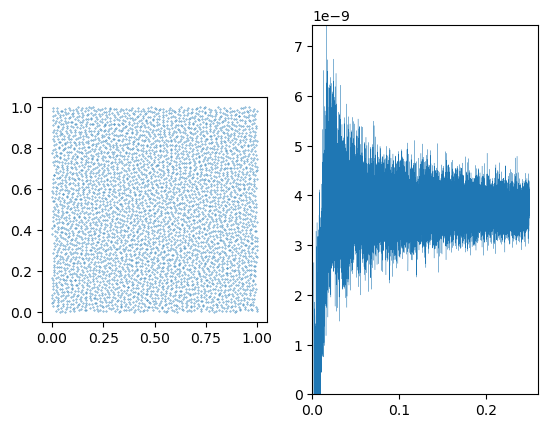

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].set_aspect(1)
#ax[1].set_aspect(1.0)

pointset = load_pointset("../utk/cmake-build-debug/src/samplers/points.txt")
ax[0].scatter(pointset[0], pointset[1], s=0.1)

rdf = load_radspec("../utk/cmake-build-debug/src/samplers/rdf.txt")
ax[1].set(xlim=[0.0, 0.26], ylim=[min(rdf[1]), max(rdf[1])])
ax[1].plot(rdf[0], rdf[1], linewidth = 0.2)

plt.rcParams['figure.dpi'] = 400
plt.show()

In [10]:
import os
import matplotlib.pyplot as plt
from matplotlib import animation


def generate_forceseries(path: str):
    forces = []
    for i in range(len(os.listdir(path))):
        with open(os.path.join(path, "force" + str(i) + ".dat"), 'r') as forcefile:
            xs = []
            ys = []
            for line in forcefile.readlines():
                x, y = line.split(" ")
                y.replace("\n", "")
                xs.append(float(x))
                ys.append(float(y))
        forces.append((xs, ys)) 
    return forces

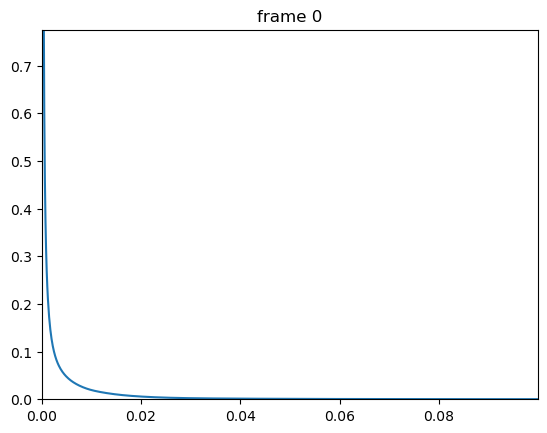

In [11]:
forces = generate_forceseries("../result_data/forces_unmodified")

fig, ax = plt.subplots()
plot = plt.plot(forces[0][0], forces[0][1])[0]

def update(frame):
    maxx = max(forces[frame][0])
    maxy = max(forces[frame][1])
    
    ax.set(xlim=[0.0, maxx * 0.2], ylim=[0.0, maxy * 0.2])
    ax.set_title("frame " + str(frame))
    plot.set_xdata(forces[frame][0])
    plot.set_ydata(forces[frame][1])

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(forces), interval=300)
anim.save("animation_forces_16384.mp4", dpi=600, writer="ffmpeg")

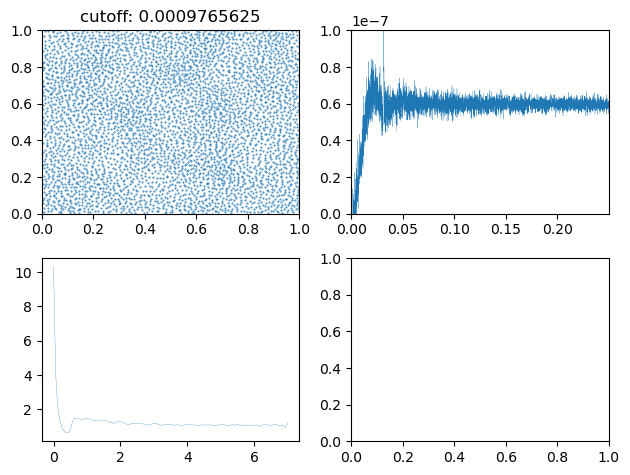

In [18]:
def load_pointset_series(path: str):
    pointsets = {}
    for pointset in os.listdir(path):
        key = float(pointset.replace("pointset_", "").replace(".txt", ""))
        pointset = load_pointset(os.path.join(path, pointset))
        pointsets[key] = pointset

    return pointsets

def load_radspec_series(path: str):
    radspecs = {}
    for radspec in os.listdir(path):
        key = float(radspec.replace("pointset_", "").replace(".rdf", ""))
        radspec = load_radspec(os.path.join(path, radspec))
        radspecs[key] = radspec

    return radspecs
        

pcfs = load_utk_rdfseries("../result_data/pointset_series/rdffiles/")
pointsets = load_pointset_series("../result_data/pointset_series/pointsets/")
radspecs = load_radspec_series("../result_data/pointset_series/radspecs/")

keys = sorted(pointsets.keys())

fig, ax = plt.subplots(2,2)
pointplot = ax[0][0].scatter(pointsets[keys[0]][0], pointsets[keys[0]][1], s=0.2)
rdfplot = ax[0][1].plot(pcfs[str(keys[0])][0],pcfs[str(keys[0])][1], linewidth=0.2)[0]
radspecplot = ax[1][0].plot(radspecs[keys[0]][0], radspecs[keys[0]][1], linewidth=0.2)[0]

fig.tight_layout()


def update(frame):

    ax[0][0].clear()
    pointplot = ax[0][0].scatter(pointsets[keys[frame]][0], pointsets[keys[frame]][1], s=0.2)
    ax[0][0].set(xlim=[0, 1], ylim=[0.0, 1.0])
    ax[0][0].set_title("cutoff: " + str(keys[frame]))

    maxx = float(max(pcfs[str(keys[frame])][0]))
    maxy = float(max(pcfs[str(keys[frame])][1]))
    
    rdfplot.set_xdata(pcfs[str(keys[frame])][0])
    rdfplot.set_ydata(pcfs[str(keys[frame])][1])

    ax[0][1].set(xlim=[0, maxx], ylim=[0.0, 1.0e-7])
    #ax[1].set_xbound(lower=-0.01, upper=maxx) 
    #ax[1].set_ybound(lower=0, upper=maxx)

    radspecplot.set_xdata(radspecs[keys[frame]][0])
    radspecplot.set_ydata(radspecs[keys[frame]][1])


anim = animation.FuncAnimation(fig=fig, func=update, frames=len(keys), interval=300)
anim.save("animation_cutoffs_with_radspec.mp4", dpi=600, writer="ffmpeg")

In [ ]:
from matplotlib import animation


def load_gradient(path: str):
    xs, ys, us, vs, cs = [], [], [], [], []
    with open(path, 'r') as gradfile:
        for line in gradfile.readlines():
            x, y, u, v = line.split(" ")
            x = float(x)
            y = float(y)
            u = float(u)
            v = float(v)
            
            xs.append(x)
            ys.append(y)
            us.append(u)
            vs.append(v)
            cs.append(np.hypot(u,v))
    
    return (xs, ys, us, vs, cs)
            

(xs, ys, us, vs, cs) = load_gradient('../result_data/gradients_no_cutoff/forces_150.txt')
fig, ax = plt.subplots()

def update(frame):
    (xs, ys, us, vs, cs) = load_gradient(f'../result_data/gradients_no_cutoff/forces_{str(frame)}.txt')
    ax.clear()
    ax.quiver(xs, ys, us, vs, cs)
    ax.scatter(xs, ys, s=2.0)
    ax.set_aspect(1.0)

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(os.listdir('../result_data/gradients_no_cutoff/')), interval=200)
anim.save("animation_gradients.mp4", dpi=600, writer="ffmpeg")